# TASK 2 - Predicting Optimum Number of Clusters

# Astha Gupta 

Importing required Libraries 

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import datasets 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# 
Importing the dataset

In [17]:
iris=datasets.load_iris()
df=pd.DataFrame({'Sepal Length':iris.data[:,0],'Sepal Width':iris.data[:,1],'Petal Length':iris.data[:,2],'Petal Width':iris.data[:,3],'cluster': iris.target})
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [30]:
mms=MinMaxScaler()
mms.fit(df)
df_transformed=mms.transform(df)

# 
For each 

In [31]:
Sum_of_squared_distances=[]
K=range(1,10)
for k in K :
    km=KMeans(n_clusters=k)
    km=km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

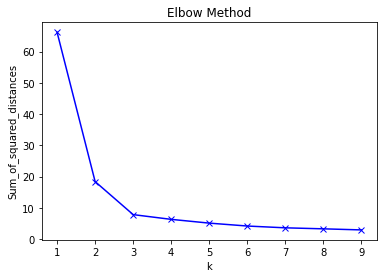

In [32]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

# 
This plot shows that the elbow is at k=3 indicating that the optimal k for the dataset is 3

Now, Applying KMeans 



In [33]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# 
Visualising the cluster for the columns Sepal Length and Sepal Width

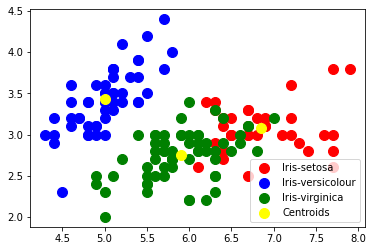

In [34]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# 
Visualising the cluster for Petal Length and Petal Width

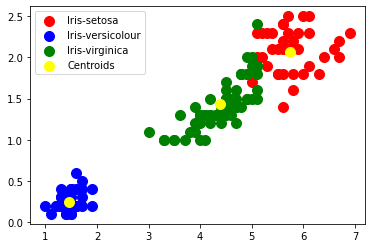

In [35]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()